In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Charger les données nettoyées
donnees = pd.read_csv('data_nettoyer.csv')

# Aperçu des premières lignes
print(donnees.head())


   Âge    Sexe     IMC  Enfants Fumeur     Région        Frais
0   19  female  27.900        0    yes  southwest  16884.92400
1   18    male  33.770        1     no  southeast   1725.55230
2   28    male  33.000        3     no  southeast   4449.46200
3   33    male  22.705        0     no  northwest  21984.47061
4   32    male  28.880        0     no  northwest   3866.85520


Âge        0
Sexe       0
IMC        0
Enfants    0
Fumeur     0
Région     0
Frais      0
dtype: int64


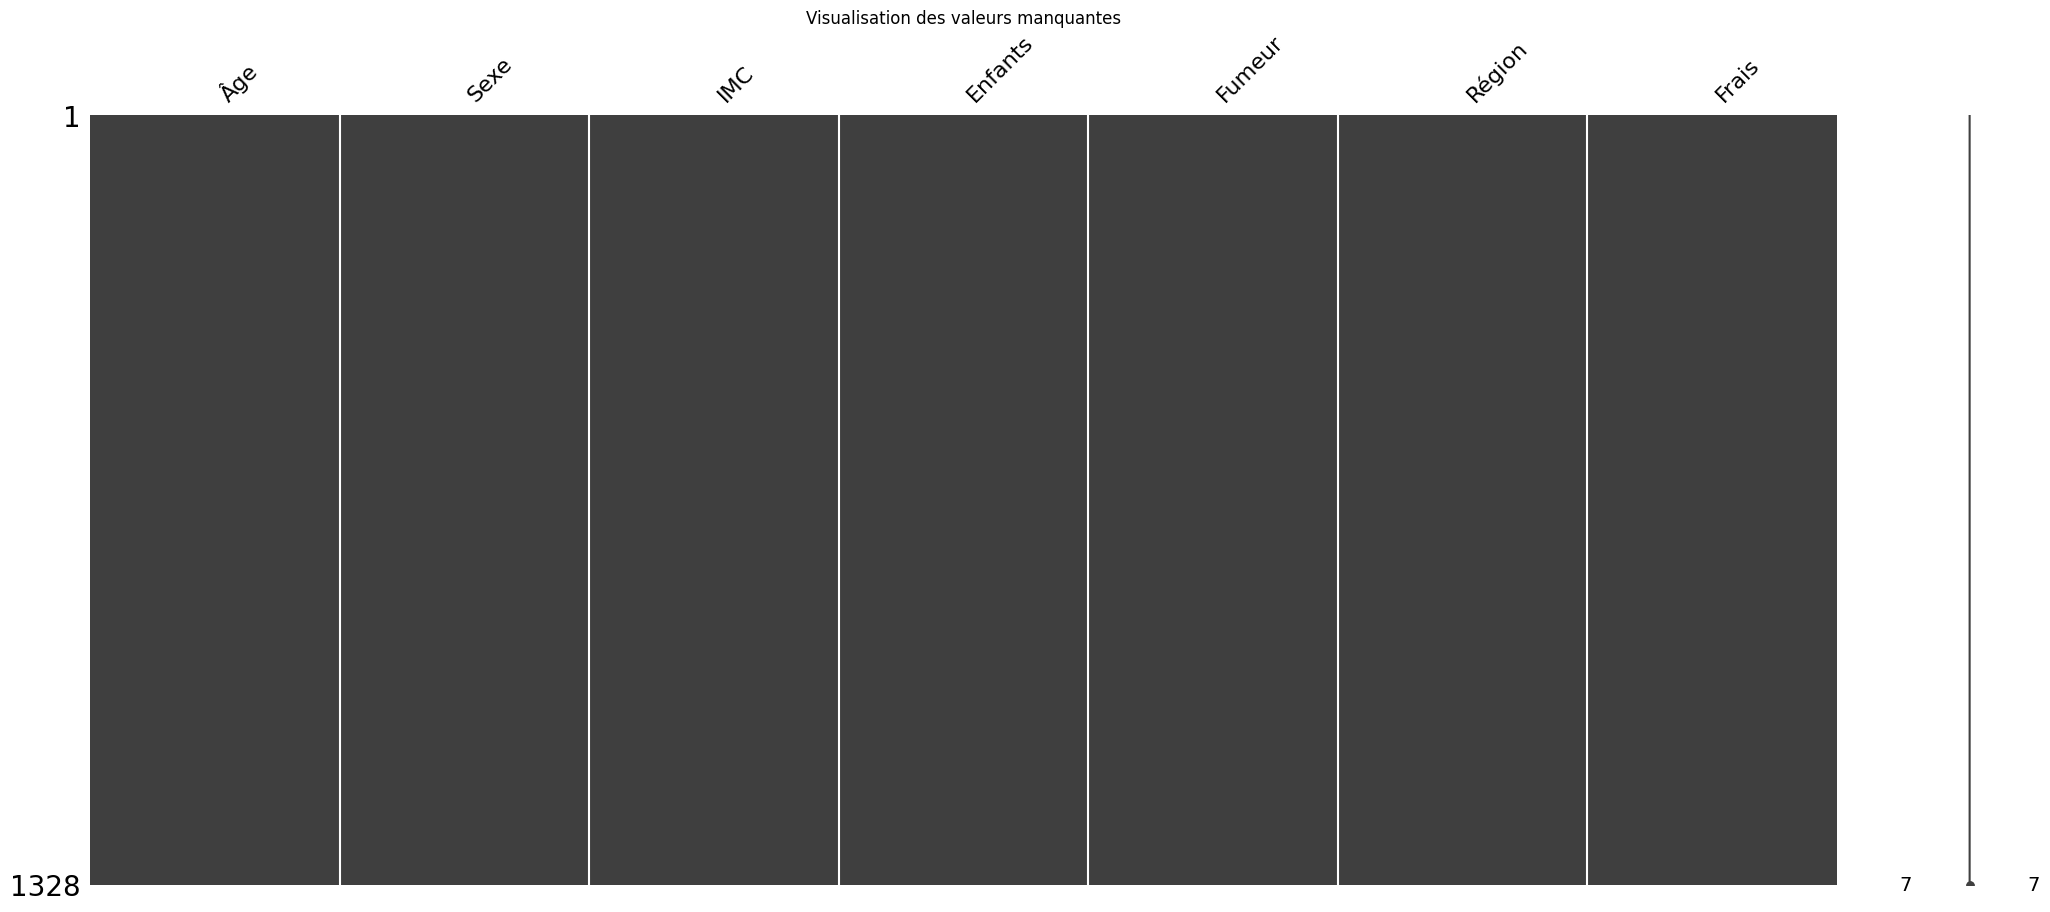

0


In [3]:
# Visualisation des valeurs manquantes avec missingno
print(donnees.isnull().sum())

# Visualisation graphique des valeurs manquantes
msno.matrix(donnees)
plt.title("Visualisation des valeurs manquantes")
plt.show()

# Vérification des doublons
print(donnees.duplicated().sum())



Statistiques descriptives des variables numériques :
               Âge          IMC      Enfants         Frais
count  1328.000000  1328.000000  1328.000000   1328.000000
mean     39.219127    30.537308     1.097139  13221.047810
std      14.042170     5.922176     1.208008  11997.547468
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.220000     0.000000   4744.325050
50%      39.000000    30.300000     1.000000   9369.615750
75%      51.000000    34.488750     2.000000  16604.302645
max      64.000000    46.750000     5.000000  62592.873090


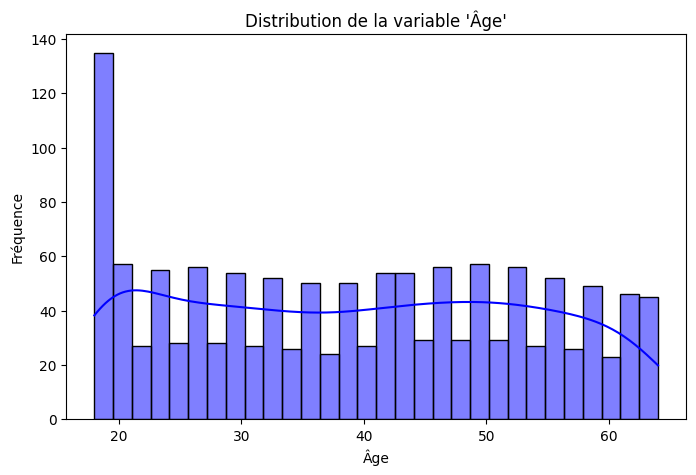

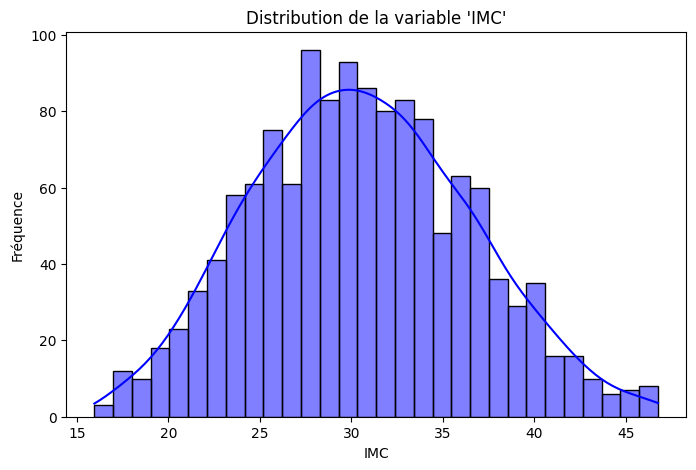

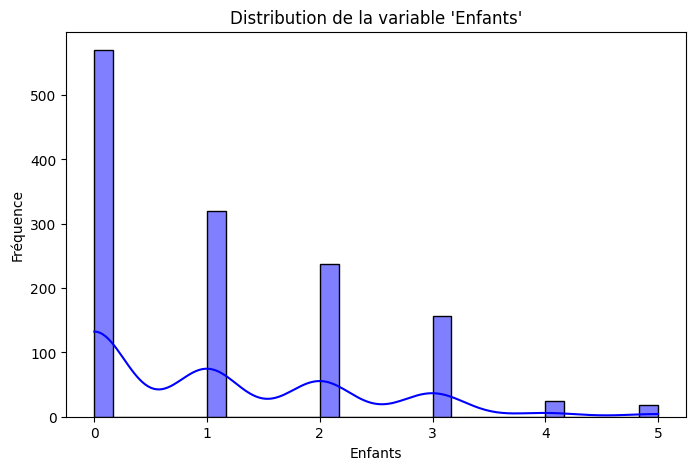

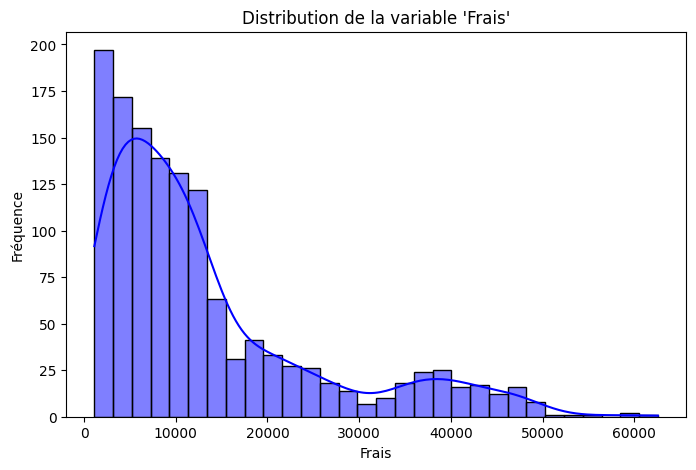

In [4]:
# Statistiques descriptives des variables numériques
print("\nStatistiques descriptives des variables numériques :")
print(donnees.describe())

# Visualisation des distributions des variables numériques
colonnes_numeriques = ['Âge', 'IMC', 'Enfants', 'Frais']
for col in colonnes_numeriques:
    plt.figure(figsize=(8, 5))
    sns.histplot(donnees[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de la variable '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


/tmp/ipykernel_31861/1798062263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=donnees, x=col, palette='pastel')


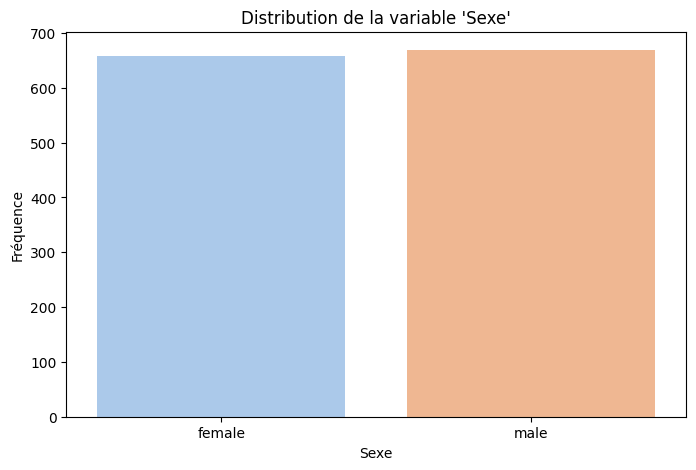

/tmp/ipykernel_31861/1798062263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=donnees, x=col, palette='pastel')


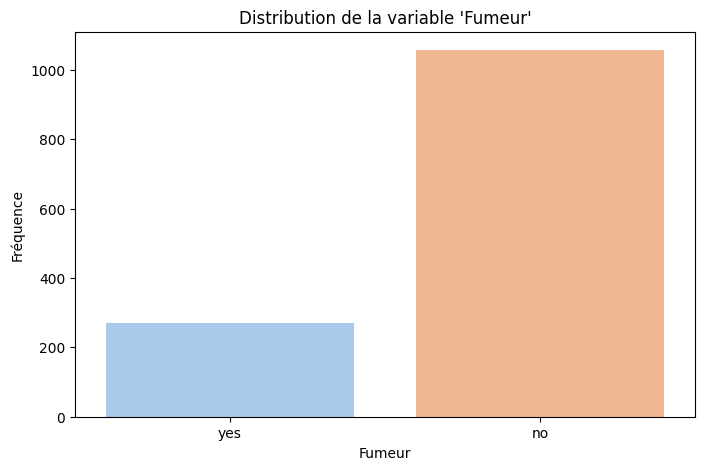

/tmp/ipykernel_31861/1798062263.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=donnees, x=col, palette='pastel')


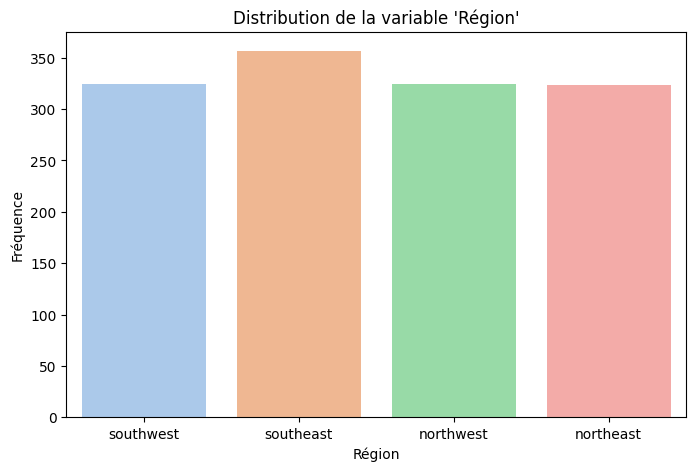

In [5]:
# Distribution des variables catégoriques
colonnes_categoriques = ['Sexe', 'Fumeur', 'Région']
for col in colonnes_categoriques:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=donnees, x=col, palette='pastel')
    plt.title(f"Distribution de la variable '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


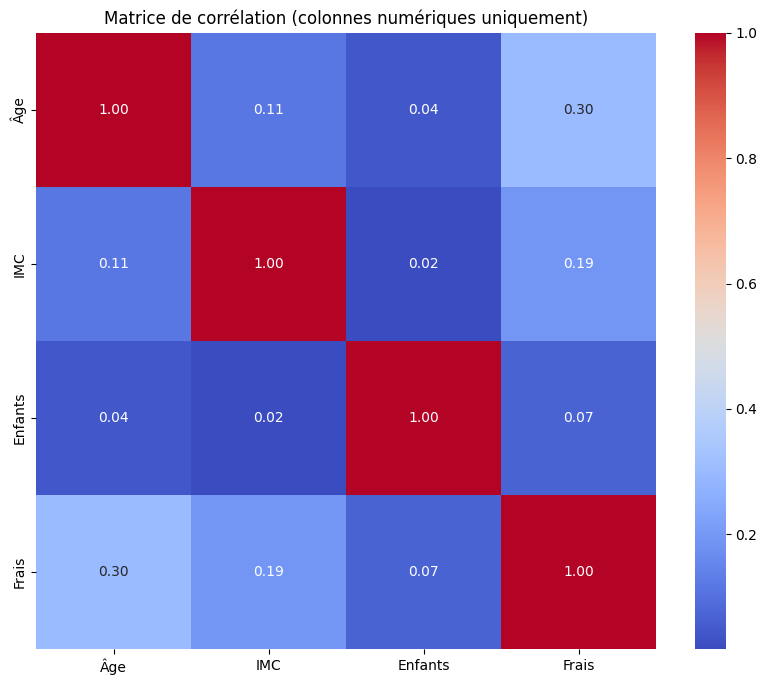


Corrélation avec la variable 'Frais' :
Frais      1.000000
Âge        0.301317
IMC        0.193270
Enfants    0.069125
Name: Frais, dtype: float64


In [6]:
# Filtrer uniquement les colonnes numériques
colonnes_numeriques = donnees.select_dtypes(include=['number'])

# Matrice de corrélation
plt.figure(figsize=(10, 8))
correlation = colonnes_numeriques.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (colonnes numériques uniquement)")
plt.show()

# Focus sur la corrélation avec la variable cible 'Frais'
print("\nCorrélation avec la variable 'Frais' :")
print(correlation['Frais'].sort_values(ascending=False))



/tmp/ipykernel_31861/740251721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees, x='Sexe', y='Frais', palette='pastel')


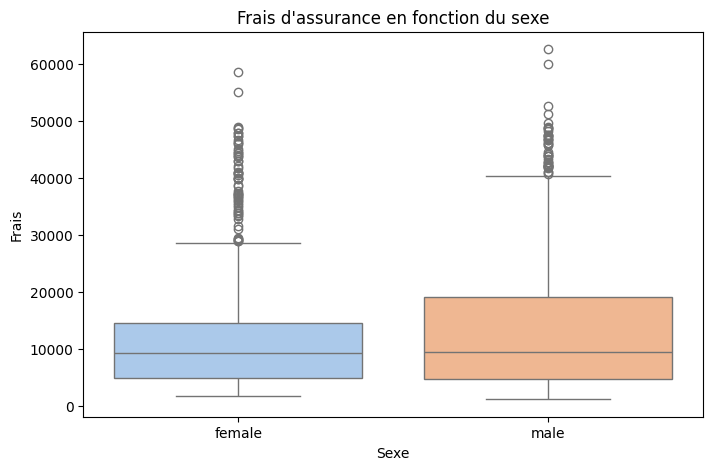

In [7]:
# Boxplot des frais en fonction du sexe
plt.figure(figsize=(8, 5))
sns.boxplot(data=donnees, x='Sexe', y='Frais', palette='pastel')
plt.title("Frais d'assurance en fonction du sexe")
plt.xlabel("Sexe")
plt.ylabel("Frais")
plt.show()


/tmp/ipykernel_31861/3451388902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees, x='Fumeur', y='Frais', palette='pastel')


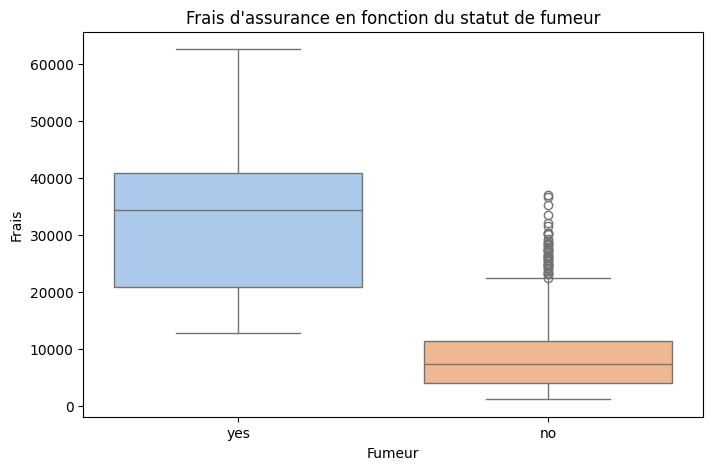

In [8]:
# Boxplot des frais en fonction du statut de fumeur
plt.figure(figsize=(8, 5))
sns.boxplot(data=donnees, x='Fumeur', y='Frais', palette='pastel')
plt.title("Frais d'assurance en fonction du statut de fumeur")
plt.xlabel("Fumeur")
plt.ylabel("Frais")
plt.show()


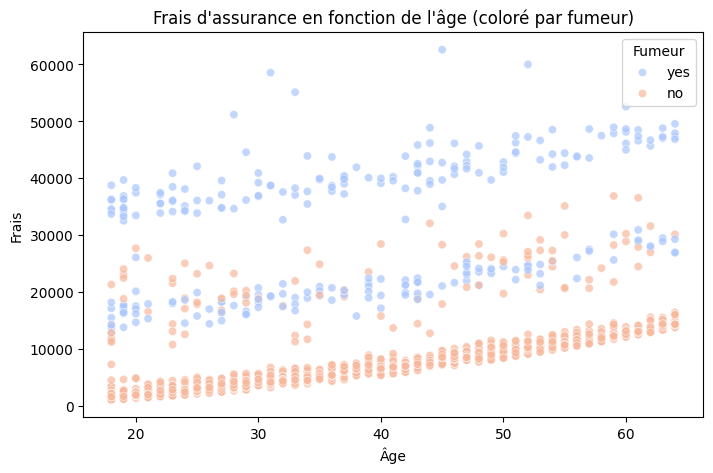

In [9]:
# Scatterplot entre Âge et Frais
plt.figure(figsize=(8, 5))
sns.scatterplot(data=donnees, x='Âge', y='Frais', hue='Fumeur', palette='coolwarm', alpha=0.7)
plt.title("Frais d'assurance en fonction de l'âge (coloré par fumeur)")
plt.xlabel("Âge")
plt.ylabel("Frais")
plt.show()


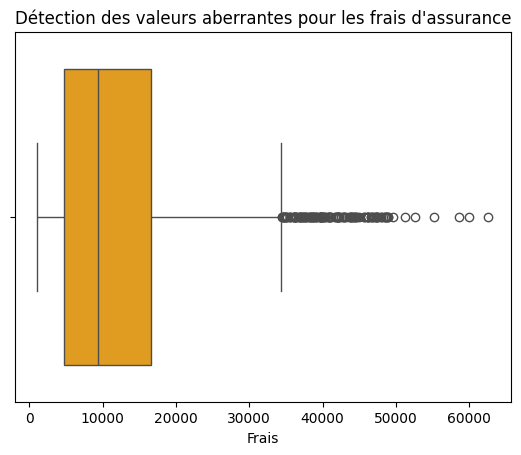

In [10]:
# Détection des valeurs aberrantes pour les Frais
sns.boxplot(x=donnees['Frais'], color='orange')
plt.title("Détection des valeurs aberrantes pour les frais d'assurance")
plt.show()


In [11]:
from scipy.stats import ttest_ind 
"""Elle est utilisée pour déterminer si les moyennes de deux groupes indépendants sont statistiquement différentes l'une de l'autre."""

# Séparer les groupes Fumeurs et Non-Fumeurs
fumeurs = donnees[donnees['Fumeur'] == 'yes']['Frais']
non_fumeurs = donnees[donnees['Fumeur'] == 'no']['Frais']

# Test t de Student
t_stat, p_val = ttest_ind(fumeurs, non_fumeurs, equal_var=False)

print("\nTest t de Student :")
print("Statistique t :", t_stat)
print("Valeur-p :", p_val)
if p_val < 0.05:
    print("Conclusion : différence significative entre les frais moyens des fumeurs et des non-fumeurs.")
else:
    print("Conclusion : Aucune différence significative entre les frais moyens des fumeurs et des non-fumeurs.")
    



Test t de Student :
Statistique t : 32.673134220128
Valeur-p : 2.493601295238723e-102
Conclusion : différence significative entre les frais moyens des fumeurs et des non-fumeurs.
